# Games Project: Which Platform Gains the Largest Revenue?

## 1 - Project Description

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## 2 - Variables Description

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

_Данные за 2016 год могут быть неполными._

## 3 - Research

### 3.1 Открываем файл с данными и изучаем общую информацию

In [131]:
import pandas as pd

In [132]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/games_project/games.csv')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [133]:
data.info() # посмотрим на типы данных и объем датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Первые выводы про качество и проблемы данных**
- Из выдачи выше видим, что число наблюдений равно около 16000, однако в некотороых переменных (Critic_Score, User_Score, Rating) наблюдений сильно меньше. Надо будет проверить эти переменные на пропуски и постараться заполнить их.
- Названия колонок в датасете приведены с верхним регистром, что может быть неудобно в дальнейшем анализе. На этапе предобработки названия лучше привести к инжнему регистру.
- На этапе предобработки надо проверить типы данных. Например, тип данных float для года (_'year_of_release'_) не совсем подходит.

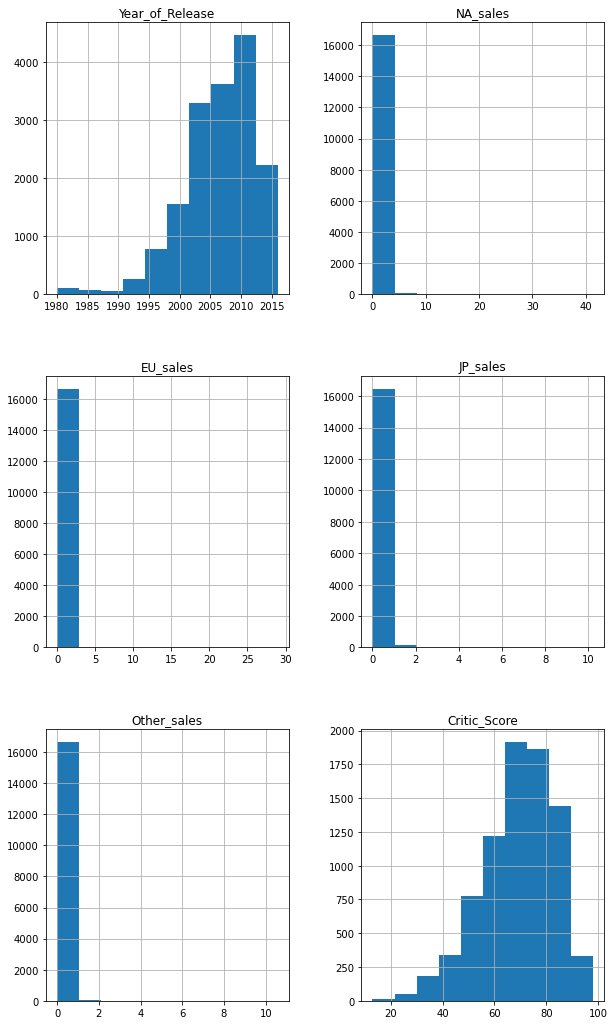

In [134]:
data.hist(figsize=(10, 18)); # смотрим на данные графически

### 3.2 Предобработка данных

#### 3.2.1 Заменим названия столбцов, приведя их к нижнему регистру

In [135]:
data.columns # выводим названия колонок датасета

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [136]:
# приведение столбцов к нижнему регистру
# OPTION 1
# data.columns = data.columns.str.lower()

In [137]:
# переименование столбцов
# OPTION 2
data = data.rename(columns = {'Name': 'name', 
                           'Platform': 'platform', 
                            'Year_of_Release': 'year_of_release', 
                             'Genre':'genre',
                           'NA_sales':'na_sales',
                             'EU_sales':'eu_sales',
                             'JP_sales':'jp_sales',
                            'Other_sales':'other_sales',
                              'Critic_Score':'critic_score',
                              'User_Score':'user_score',
                              'Rating':'raiting'
                             })
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### 3.2.2 Преобразуем данные в нужные типы

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  raiting          9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [139]:
import numpy as np

In [140]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce').astype('float64')

In [141]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')

In [142]:
# data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('Int64')

Год (year_of_release) пока оставляем как float, так как нам надо будет позже заполнить пропуски в этой колонке. И затем можно будет поменять тип на целочисленный.

#### 3.2.3 Обработаем пропуски

Проверим, где и в каком объеме имеются пропуски в данных.

In [143]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Видим, что пропуски есть в трех колонках:
- _critic_score_ (51%)
- _user_score_ (55%)
- _raiting_ (40%)
- _year_of_release_ (2%)

_Посчитаем, сколько пропусков (для информации)._

In [144]:
data['critic_score'].isna().sum()

8578

In [145]:
data['user_score'].isna().sum()

9125

In [146]:
data['raiting'].isna().sum()

6766

In [147]:
data['year_of_release'].isna().sum()

269

**Поставим на пропущенные значения заглушку -1 в столбцах _user_score, critic_score_, чтобы позже ее отфильтровать и не использовать в анализе.**

In [148]:
# data['critic_score'] = data['critic_score'].fillna(data.groupby(['platform', 'genre'])['critic_score'].transform('median'))

In [149]:
# data['user_score'] = data['user_score'].fillna(data.groupby(['platform', 'genre'])['user_score'].transform('median'))

In [150]:
data['critic_score'].fillna(-1, inplace=True)
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [151]:
# посчитаем, сколько поставили заглушек и сверим с количеством NaN, посчитанных в предыдущем шаге
data['critic_score'].where(data['critic_score'] == -1).count() 

8578

In [152]:
data['user_score'].fillna(-1, inplace=True)
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [153]:
# посчитаем, сколько поставили заглушек и сверим с количеством NaN, посчитанных в предыдущем шаге
data['user_score'].where(data['user_score'] == -1).count() 

9125

Наша ошибка в подходе к заполнению пропусков в колонках отзывов медианой связана с тем, что данные этих колонок не являются набором случайных данных. 

Если бы у нас была выборка оценок пользователей по отзывам на одну игру, то ее можно было считать случайными данными. Один пользователь поставил отметку 1, другой 10. Одному игра не понравилась, другому понравилсь. Пропуски в такой выборке мы можем заменить средним/медианой/модой, так как все данные относятся к одной и той же игре.

В нашем случае отзыв как раз и является таким усреднением выборки оценок пользователей по одной игре и является признаком именно этой игры, не зависящей от жанра, платформы и т.д. Более того, если внимательно посмотреть на датасет, то можем найти примеры, когда одна игра на разных платформах имеет двукратное различие в оценках пользователей. Возможно, что не на всех платформах можно достичь высокого качества графики, скорости и т.д.

Так же формируется и отзыв критиков. Определенное количество критиков протестировало игру, выставило свою оценку, которую потом усреднили и присвоили конкретной игре. То есть отзыв критиков стал признаком конкретной игры и не зависит от жанра, платформы и т.д.

По этому пропуски отзывов нельзя заполнять синтетическими данными извлекаемыми из оценок других игр.
Наша задача при анализе датасета и обработке пропусков заключается определить, что собой представляют данные и какие реальные бизнес-процессы они описывают. И в зависимости от этого принимать решение об обработке.

**</b></font><br>
<font color='DarkGreen'>В предобработке данных датасета иногда применяется термин: <b>Синтетика или синтетические данные</b>. <br>
То есть искусственные данные, отсутствующие в исходном датасете. <br>В анализе данных ими иногда заполняют пропуски. Синтетические данные создаются или случайно (рандомно) из заданного диапазона значений, или по средним/медианным/и др. значениям не пустых данных колонки, в том числе с группировкой до данным других колонок. <br>В отдельных задачах используются различные генераторы имитирующие реальные данные. <br>Для целей анализа синтетика должна использоваться осторожно, так как она искажает реальные данные, особенно при большом количестве пропусков, заменяемых синтетическими данными. Замена пропусков синтетикой зависит от исследовательской задачи.**

</font><font color='Blue'><b>**Поставила заглушки -1 на пропуски в оценке критиков и пользователей. Далее в анализе буду фильтровать по ним. Пропущенные значения _year_of_release_ удалила.**</b></font><br>

**Удалим 2% пропусков в столбцах _year_.**

In [154]:
data = data.dropna(subset=['year_of_release'])
print(data['year_of_release'].isna().sum())

0


<font color='DarkBlue'><b>Почему удаляем год релиза и когда, что удалять.</b></font><br>
<font color='DarkGreen'>В реальности все зависит от поставленной задачи на исследование. В данном проекте необходимо определить актуальный период, на основании которого мы и будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза. А можно провести анализ, сколько пропусков года релиза приходится на платформы, которые например к 2000 году уже вышли с рынка, то есть для прогноза на 2017 год мы их явно учитывать не будем.</font>

**Категориальные значения в колонке _raiting_ изучим дополнительно.**

In [155]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


**Видим, что в столбце _raiting_ осталось 41% пропусков. Это больше 10%, что не позволяет удалить эти пропуски.**

In [156]:
pd.options.mode.chained_assignment = None

In [157]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

In [158]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


**Изучим колонку рейтинга _'raiting'_.**

**СПРАВКА**

[Entertainment Software Rating Board (ESRB)](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

- «E» («Everyone») — «Для всех»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC»(«K-A» - в ранних версиях с 1994-1997 годы) («Early childhood») — «Для детей младшего возраста»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Из справки видим, что самый подходящий способ заполнить пропуски в колонке ретийнга - RP ("Raiting Pending", или рейтинг ожидается).

In [159]:
data['raiting'].fillna('RP', inplace=True) # сразу меняем тут же
data['raiting'].isna().sum()

0

**Колонки _critic_score_, _user_score_ заполнены заглушкой для анализа "-1".**

<font color='DarkBlue'><b>В чем разница, оставлять NaN или ставить заглушку:</b></font><br>
<font color='DarkGreen'><br>
- NaN нам не мешают при построении графиков и расчете корреляции, но искажает расчет в тесте Стьюдента мы получим NaN. А так как пропуск не везде мешает, то мы можем забыть его отфильтровать и получить не верный результат. В отдельных случаях наличие пропуска в датасете не связано с низким качеством сбора данных датасета, а может являтся значимым признаком, но если мы пропуск не заменим на заглушку, то мы этого даже не заметим. Пример в нашем проекте - хитрый рейтинг ESRB.
- Заглушка нам везде мешает, по этому мы при анализе целевого параметра, который в датасете содержал NaN, мы всегда отфильтровываем ее. Заглушку лучше ставить далеко вне диапазона целевых параметров. Если мы вдруг забудем ее отфильтровать, то сразу заметим при преобразованиях. Кроме того, заглушка показывает, что мы оценили количество пропусков в датасете и приняли по ним обоснованное решение. Но мы можем сделать анализ и с учетом заглушки и обнаружить неявный признак который нес пропуск. Что мы и сделали в этом проекте.</font>

**В таком виде данных переходим к дальнейшему анализу.**

In [160]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


**Готово.**

#### 3.2.4 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [161]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP


Суммарные продажи складываются из продаж во всех регионах, то есть путем сложения переменных _na_sales, eu_sales, jp_sales, other_sales_.

In [162]:
# OPTION 1
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [163]:
# OPTION 2
# data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#### 3.2.5 Колонка _'name'_ содержит неявные дубликаты в строках (названия содержат слэши \). Удалим их.

In [164]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [165]:
data['name'] = data['name'].astype(str)

In [166]:
import re
compiler = re.compile(r'([A-Z]+[a-z]+)|([a-z]+)|(NEC)+')

def name(name:str):
    norm = ''
    groups = compiler.findall(name)
    for gr in groups:
        for s in gr:
            if s != '':
                norm+=s + ' '
    norm = norm.strip()
    return norm


data['name'] =  data['name'].apply(name)

In [167]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros', 'Mario Kart Wii', ...,
       'Aiyoku no Eustia', 'Woody Woodpecker in Crazy Castle',
       'Haitaka no Psychedelica'], dtype=object)

После удаления и заполнения пропусков проставим индексы заново.

In [168]:
# проставим индексы заново
data.reset_index(inplace=True, drop=True)
display(data.tail())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
16441,Samurai Warriors Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,-1.0,-1.0,RP,0.01
16442,Manager,X360,2006.0,Sports,0.00,0.01,0.00,0.0,-1.0,-1.0,RP,0.01
16443,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,-1.0,-1.0,RP,0.01
16444,Spirits Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,-1.0,-1.0,RP,0.01
16445,Winning Post,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,-1.0,-1.0,RP,0.01


In [169]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01
16442,Manager,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,RP,0.01
16443,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01
16444,Spirits Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,RP,0.01


Готово. Переходим к исследовательскому анализу данных.

In [170]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'raiting']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  raiting          16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
None
-------------------------
name ['' 'Aa Megami samaa' 'Abunai Koi no Sousa Shitsu' ... 'vs the World' 'x'
 'x Evolution']
name : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
pla

In [171]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  raiting          16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [173]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'raiting']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  raiting          16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name ['' 'Aa Megami samaa' 'Abunai Koi no Sousa Shitsu' ... 'vs the World' 'x'
 'x Evolution']
name : кол-во NaN 0 , процент NaN 0.0 %
-------------------

### 3.3 Исследовательский анализ данных

#### 3.3.1 Изучим, сколько игр выпускалось в разные годы.

In [174]:
games_per_year = data.groupby('year_of_release').agg({'total_sales': ['count', 'sum']}).reset_index()
games_per_year.columns = ['year', 'quantity', 'total_sales']
games_per_year

,year,quantity,total_sales
0,1980,9,11.38
1,1981,46,35.68
2,1982,36,28.88
3,1983,17,16.80
4,1984,14,50.35
5,1985,14,53.95
6,1986,21,37.08
7,1987,16,21.70
8,1988,15,47.21
9,1989,17,73.45


In [175]:
import matplotlib.pyplot as plt

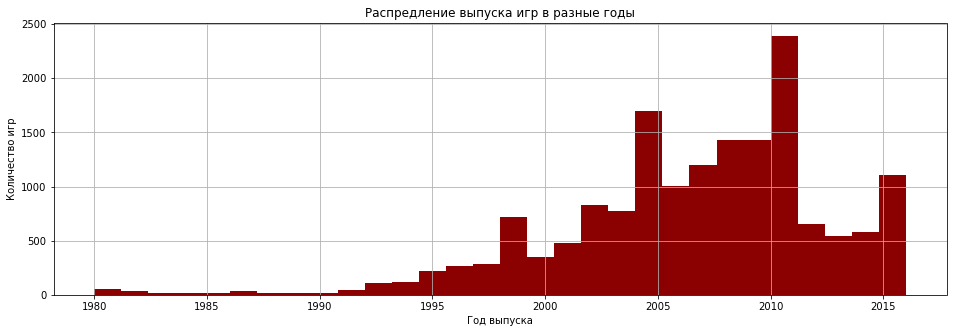

In [176]:
data['year_of_release'].plot(kind='hist', figsize = (16, 5), grid=True, color='darkred', bins=30, title='Распредление выпуска игр в разные годы');
plt.xlabel('Год выпуска'), plt.ylabel('Количество игр')
plt.show();

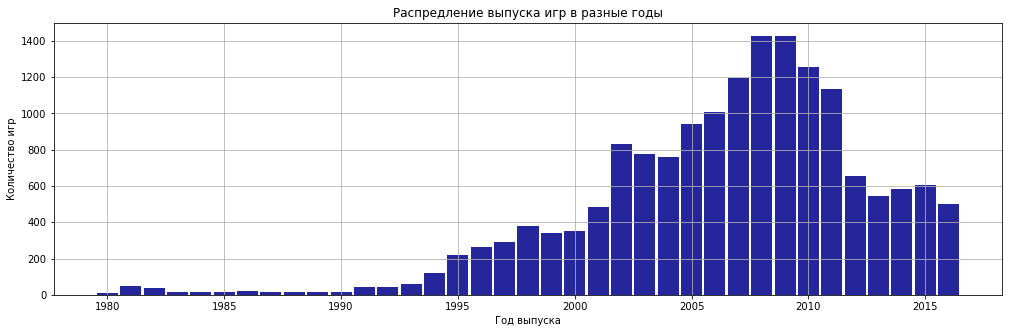

In [177]:
plt.figure(figsize=(17, 5))
plt.bar(games_per_year['year'], games_per_year['quantity'], label='Количество выпущенных игр', color='darkblue', alpha=0.85, width=0.9)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid()
plt.title(f'Распредление выпуска игр в разные годы')
# plt.legend()
plt.show()

In [178]:
games_per_year.sort_values(by='quantity', ascending=False)

,year,quantity,total_sales
28,2008,1427,671.50
29,2009,1426,658.82
30,2010,1255,590.13
27,2007,1197,604.75
31,2011,1136,507.58
26,2006,1006,517.71
25,2005,939,457.82
22,2002,829,394.97
23,2003,775,357.54
24,2004,762,418.68


**Выводы:**

- больше всего игр выпускалось между 2005 и 2010 годами;
- максимальное число игр в предложенных данных было выпущено в 2008 году (1471 игра).

#### 3.3.2 Как менялись продажи по платформам? Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [179]:
max_sales = data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()
max_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Видим, что число продаж сильно отличается дл каждой платформы. Изучим те, где продажи > 200.

In [180]:
max_sales = max_sales.query('total_sales > 200')
max_sales = max_sales['platform'].unique()

In [181]:
leading_platform = data[data['platform'].isin(max_sales)].sort_values('year_of_release')
leading_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
690,Mario Bros,NES,1983,Platform,0.51,0.12,1.63,0.02,-1.0,-1.0,RP,2.28
1790,Donkey Kong,NES,1983,Platform,0.23,0.05,0.84,0.01,-1.0,-1.0,RP,1.13
763,Mahjong,NES,1983,Misc,0.01,0.00,2.13,0.00,-1.0,-1.0,RP,2.14
424,Baseball,NES,1983,Sports,0.73,0.10,2.35,0.02,-1.0,-1.0,RP,3.20
1823,Donkey Kong Jr,NES,1983,Platform,0.33,0.07,0.70,0.01,-1.0,-1.0,RP,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...
15501,Revolution th Anniversary Collection,PC,2016,Adventure,0.00,0.02,0.00,0.00,-1.0,-1.0,RP,0.02
2192,Kirby Planet Robobot,3DS,2016,Action,0.28,0.14,0.47,0.04,81.0,8.7,E,0.93
7656,Mafia,PC,2016,Action,0.08,0.10,0.00,0.02,63.0,3.2,M,0.20
16067,,PC,2016,Racing,0.00,0.01,0.00,0.00,-1.0,-1.0,RP,0.01


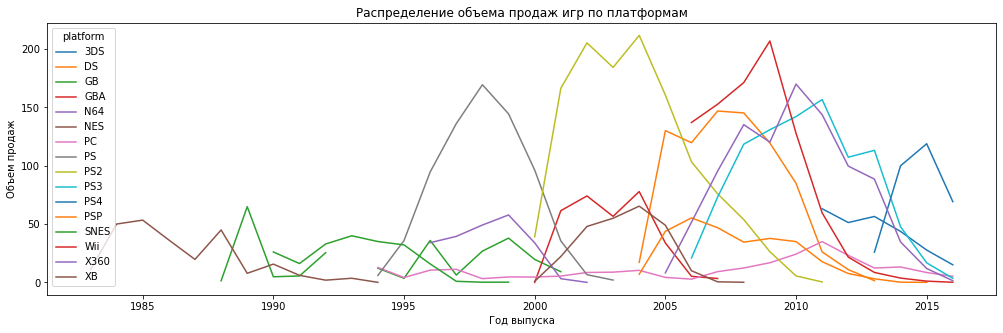

In [182]:
fig, ax = plt.subplots(figsize=(17,5))
pd.pivot_table(leading_platform, index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска'), plt.ylabel('Объем продаж')
plt.title('Распределение объема продаж игр по платформам');

**Выводы:**

- лидирует по объемам продаж платформа PS2;
- для выпуска новой игры, в среднем, требуется 5 лет;
- видим, что до 1995 года игры были неактуальны, затем началось развитие игровой индустрии. Срез данных для построения прогноза берем за 3 последних года - **2016, 2015 и 2014 годы.**

#### 3.3.3 Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Из результатов выше актуальным периодом выбираем отрезок 2014 - 2016 годы, когда игровая индустрия уже получила развитие.

In [183]:
actual_data = data.query('year_of_release > 2013')
len(actual_data)

1689

In [184]:
actual_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,30.162818,3.008111,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,37.114050,3.978406,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,-1.000000,3.400000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,71.000000,7.100000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


Данные за предыдущие годы не учитываем.

#### 3.3.4 Какие платформы лидируют по продажам, растут или падают? 

In [185]:
pd.pivot_table(actual_data, index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [186]:
actual_data['year_of_release'] = actual_data['year_of_release'].astype('int')

In [187]:
import matplotlib.ticker

''

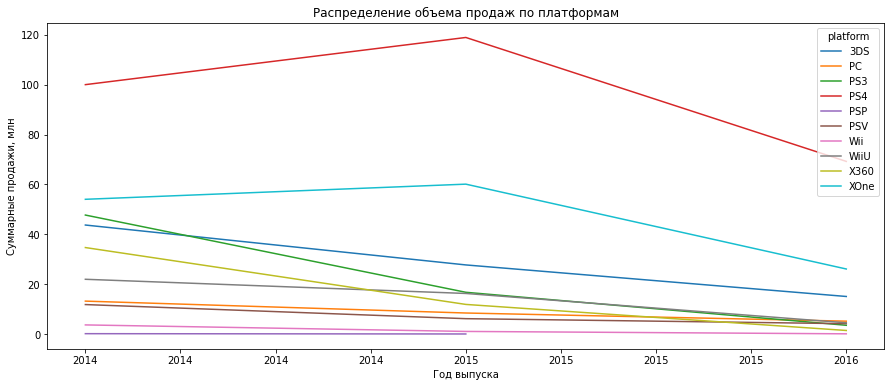

In [188]:
fig, ax = plt.subplots(figsize=(15,6))
pd.pivot_table(actual_data, index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска'), plt.ylabel('Суммарные продажи, млн')
plt.title('Распределение объема продаж по платформам')
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d')) # убрать дробные значения годов
;

**Выводы:**

- DS и PSP не имеют продаж начиная с 2014 и 2016 годов.
- у PSV в 2014 году рост и сильный спад в 2015-2016 годах.
- PS показывает незначительный рост, начиная с 2015 года.
- продажи WiiU падают, начиная с 2014
- продажи X360 и PS3 падают вниз, по причине выхода новых версий платформ: XOne и PS4 в 2013, которые начиная с 2013 имеют хороший рост.
- Заметно преобладание нескольких платформ на рынке - это XOne и PS4. К 2016 продажи игр на всех платфомах идет на спад, это может быть по какой-либо причине в мире (по этому вопросу следует лучше изучить игровую индустрию) или выбросы.

#### 3.3.5 Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

(0.0, 5.0)

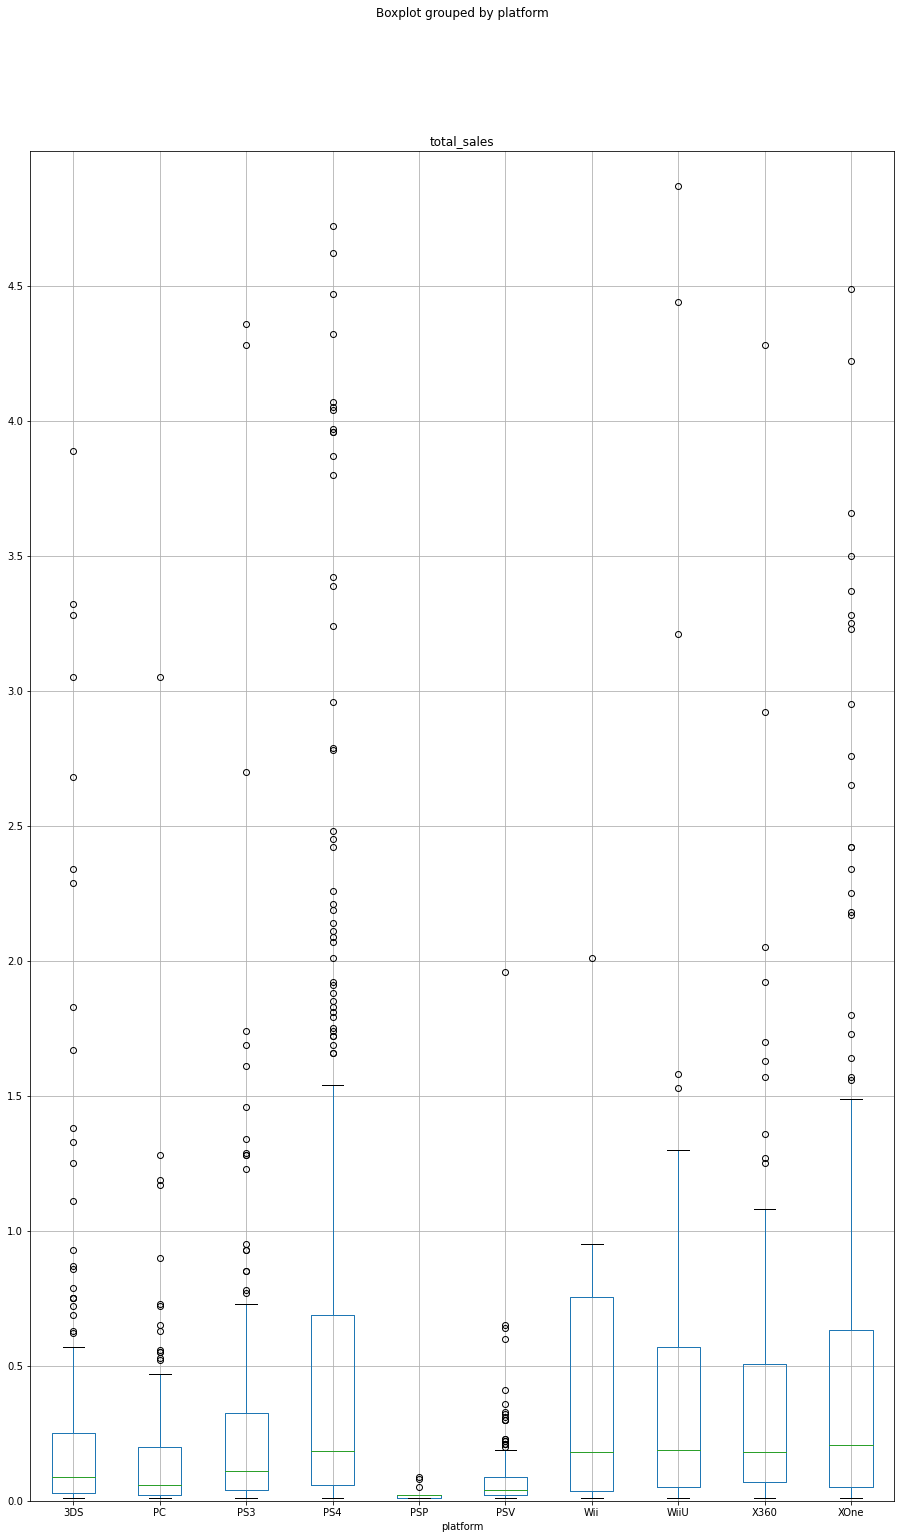

In [189]:
actual_data.boxplot(by='platform', column='total_sales', figsize=(15,25), fontsize=10, grid=True)
plt.yticks(np.arange(0, 5, 0.5))
plt.ylim(0, 5)

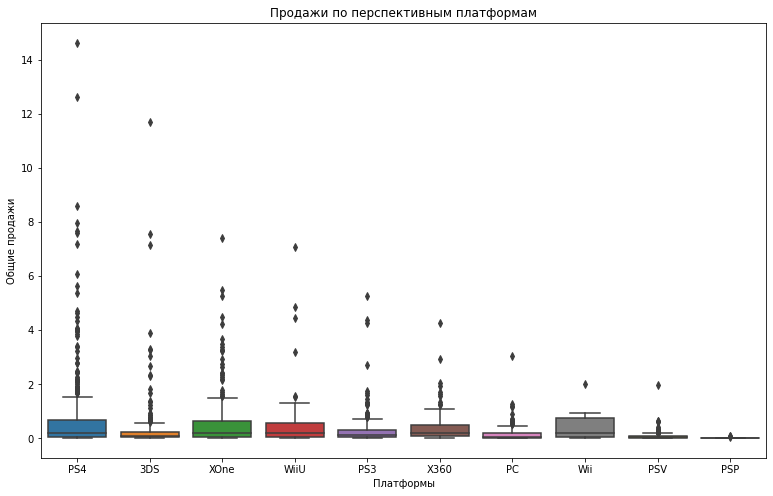

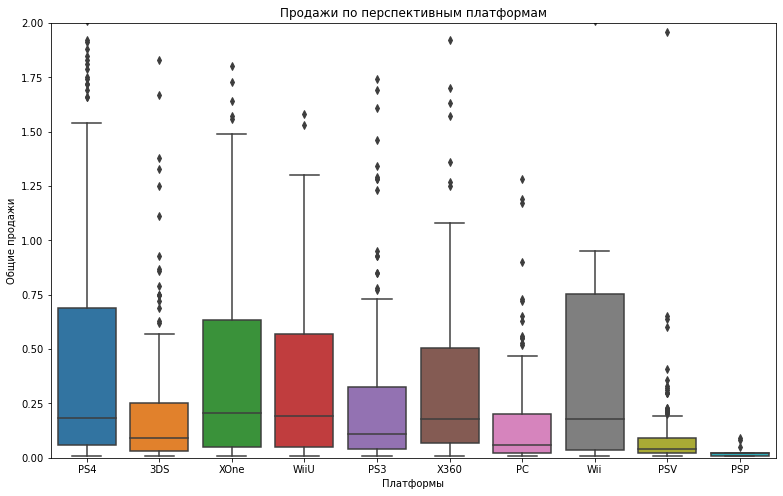

In [190]:
import seaborn as sns
data_temp, y = actual_data, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

**Вывод:**

- **Продажи на популярных платформах схожи.**
- **Медианные значения продаж у четырех X360, PS3, Wii, PS2 находятся близко к уровню 0,2, а в других 4 к уровню 0,1.**
- **На платформах 3DS, DS и PSP большая часть проданых игр лежит до значения в 0,5-0,6, на платформах PS4, Wii и PS2 до 0,85-1, а в лидерах X360 до 1,1 млн и в PS3 до 1,3 млн.**

In [191]:
actual_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
31,Call of Duty Black Ops,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63
42,Grand Theft Auto,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,RP,11.68
77,,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront,PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,RP,7.98


#### 3.3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Определим самую популярную платформу по объему продаж в отфильтрованном датасете с актуальными данными _actual_data_.

**Видим, что лидером по объему продаж является платформа PS4 (оброт 219 млн руб с 2014 по 2016 годы). Сформируем датасет только с данными этой платформы PS4.**

In [192]:
ps4 = actual_data[actual_data['platform'].isin(['PS4'])]
ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
31,Call of Duty Black Ops,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63
42,Grand Theft Auto,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront,PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,RP,7.98
92,Call of Duty Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


**Напишем функцию для расчета корреляции, куда в качестве аргумента передадим два регрессора - _'critic_score', 'user_score'_.**

На продажи влияют critic_score 0.21084685336721357


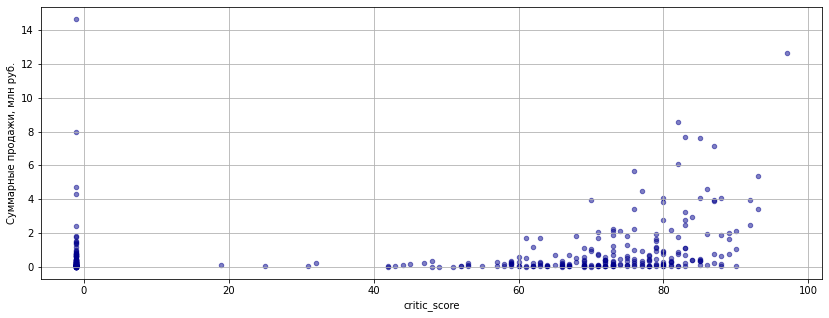

In [193]:
def correlation(regressor):
    print('На продажи влияют', regressor , ps4['total_sales'].corr(ps4[regressor]))
    ps4.plot(x=regressor, y='total_sales', kind='scatter', color='darkblue', grid=True, figsize=(14,5), alpha=0.5)
    plt.ylabel('Суммарные продажи, млн руб.')
    ;

correlation('critic_score')

Изменим тип перменной _'user_score'_ на десятичной число с плавающей точкой.

In [194]:
# ps_platform['user_score'].astype(float)
ps4['user_score'] = pd.to_numeric(ps4['user_score'], errors='coerce').astype('float64')

На продажи влияют user_score 0.10411505527257894


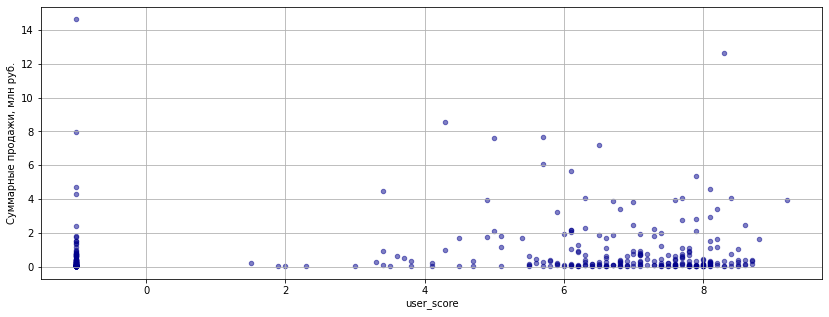

In [195]:
correlation('user_score')

**Выводы:**

- Оценки критиков имеет более положительную корреляцию с продажами (k = 0.40).
- Оценки пользователей имеет слабую отрицательную корреляцию с продажами (k = -0.04).

_Корреляция помогает понять общее представление о влияние переменных на зависимую переменную. Однако нельзя принимать на веру значения коэффицента корреляции, так как он не является инференцией в регрессионной модели._

#### 3.3.7 Соотнесем выводы с продажами игр на других платформах.

In [196]:
actual_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [197]:
actual_data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


**Изучим остальные платформы 'WiiU', 'XOne', '3DS', 'PC', 'X360', 'PS3', 'PSV' в отдельности и сравним с лидерром продаж 'PS4'.**

- **WiiU**

In [198]:
WiiU_platform = actual_data[(actual_data['platform'].isin(['WiiU'])) & (actual_data['critic_score'] != -1) \
                            & (actual_data['user_score'] != -1)]
WiiU_platform.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,total_sales
110,Mario Kart,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
246,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
422,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,3.21
1162,Mario Party,WiiU,2015,Misc,0.69,0.53,0.24,0.12,66.0,6.5,E,1.58
1219,Donkey Kong Country Tropical Freeze,WiiU,2014,Platform,0.70,0.55,0.16,0.12,83.0,8.9,E,1.53


На продажи влияют critic_score 0.3756402218389979


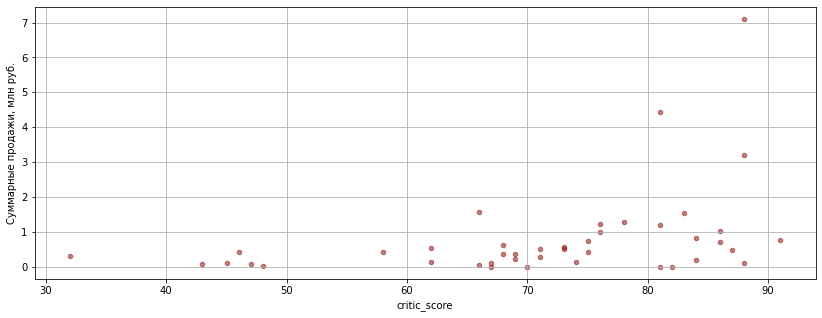

In [199]:
def corr_other(regressor, actual_data_platform):
    print('На продажи влияют', regressor , actual_data_platform['total_sales'].\
          corr(actual_data_platform[regressor]))
    actual_data_platform.plot(x=regressor, y='total_sales', kind='scatter', color='darkred', \
                              grid=True, figsize=(14,5), alpha=0.5)
    plt.ylabel('Суммарные продажи, млн руб.')
    ;

corr_other('critic_score', WiiU_platform)

Изменим тип перменной _'user_score'_ на десятичной число с плавающей точкой.

In [200]:
WiiU_platform['user_score'] = pd.to_numeric(WiiU_platform['user_score'], errors='coerce').astype('float64')

На продажи влияют user_score 0.4114513876908575


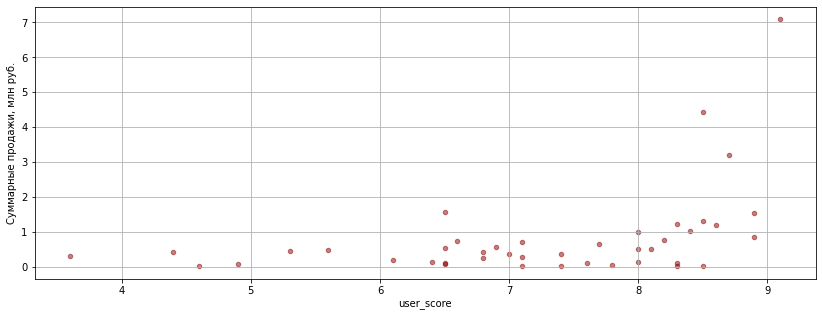

In [201]:
corr_other('user_score', WiiU_platform)

**Вывод WiiU:**
- обе оценки как критиков, так и пользователей положительно влияют на продажи;
- обе оценки примерно одинаково влияют на продажи.

- **XOne**

In [202]:
XOne_platform = actual_data[(actual_data['platform'].isin(['XOne'])) & (actual_data['critic_score'] != -1) \
                            & (actual_data['user_score'] != -1)]

На продажи влияют critic_score 0.4221118510555765


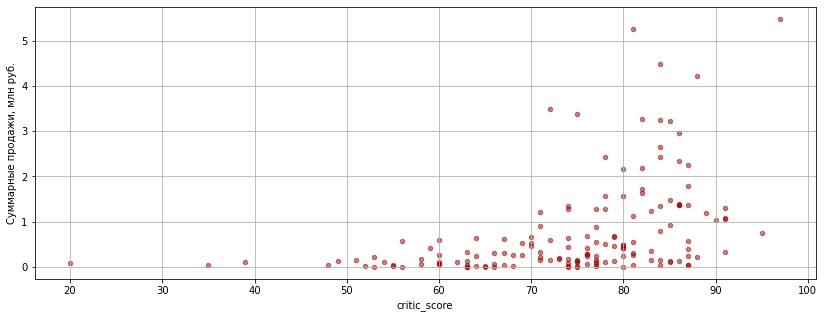

In [203]:
corr_other('critic_score', XOne_platform)

На продажи влияют user_score -0.09173434503310748


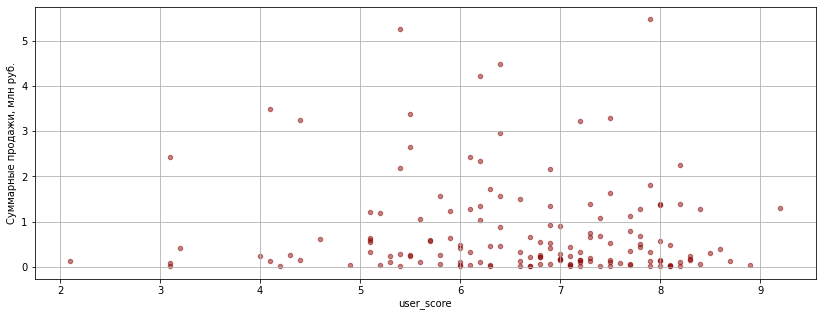

In [204]:
corr_other('user_score', XOne_platform)

**Вывод XOne:**
- оценка критиков имеет положительное влияние на продажи (k=0.42)
- оценка пользователей имеет слабое отрицательное влияение на продажи (k=-0.09)

- **3DS**

In [205]:
one3DS_platform = actual_data[(actual_data['platform'].isin(['3DS'])) & (actual_data['critic_score'] != -1) \
                            & (actual_data['user_score'] != -1)]

На продажи влияют critic_score 0.28468579095782925


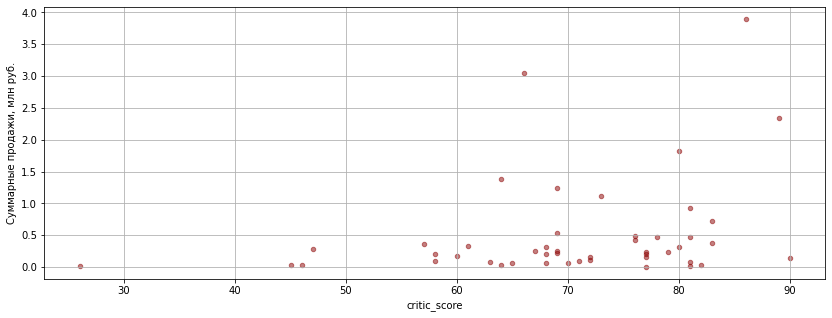

In [206]:
corr_other('critic_score', one3DS_platform)

На продажи влияют user_score 0.2798498792503281


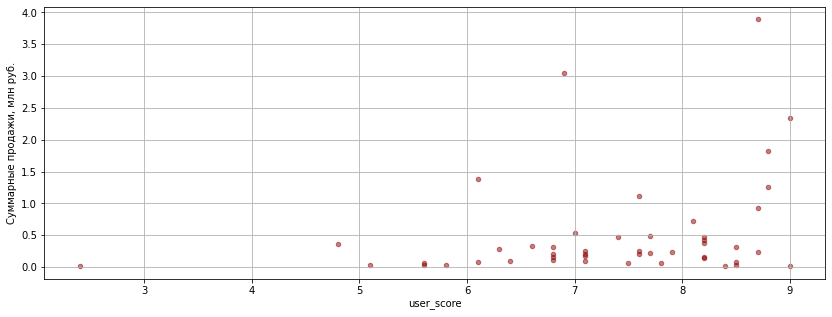

In [207]:
corr_other('user_score', one3DS_platform)

**Вывод 3DS:**
- оценка критиков имеет положительное влияние на продажи (k=0.27)
- оценка пользователей имеет положительное влияение на продажи (k=0.28)
- обе оценки имеют одинаковое влияение на продажи.

- **PC**

In [208]:
PC_platform = actual_data[(actual_data['platform'].isin(['PC'])) & (actual_data['critic_score'] != -1) \
                            & (actual_data['user_score'] != -1)]

На продажи влияют critic_score 0.17206091490145103


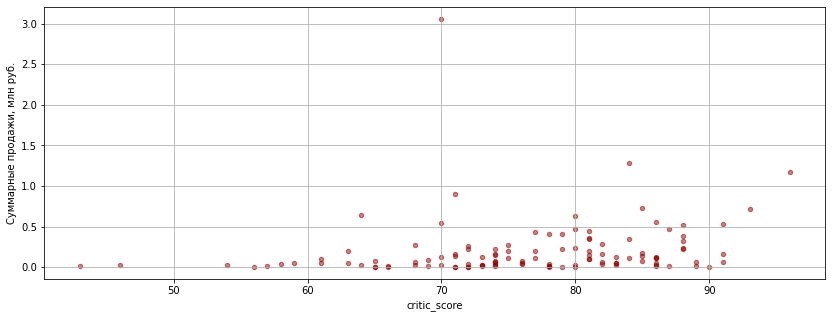

In [209]:
corr_other('critic_score', PC_platform)

На продажи влияют user_score -0.08997391228554938


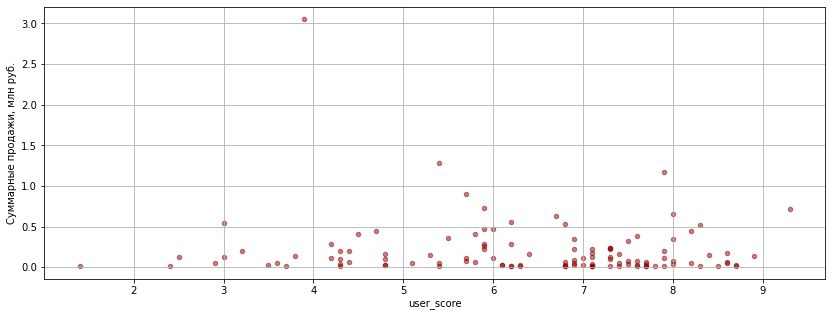

In [210]:
corr_other('user_score', PC_platform)

**Вывод PC:**
- оценка критиков имеет положительное влияние на продажи (k=0.17)
- оценка пользователей имеет слабое отрицательное влияение на продажи (k=-0.08)
- оценки критиков и пользователей по-разному влияют на продажи.

- **PS3**

In [211]:
PS3_platform = actual_data[(actual_data['platform'].isin(['PS3'])) & (actual_data['critic_score'] != -1) \
                            & (actual_data['user_score'] != -1)]

На продажи влияют critic_score 0.44657460493190704


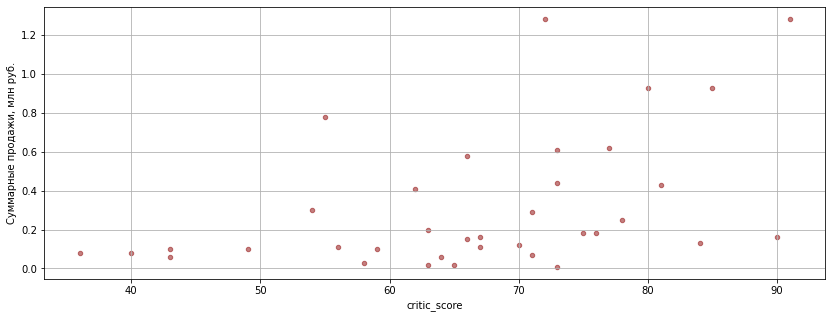

In [212]:
corr_other('critic_score', PS3_platform)

На продажи влияют user_score 0.1565951618135996


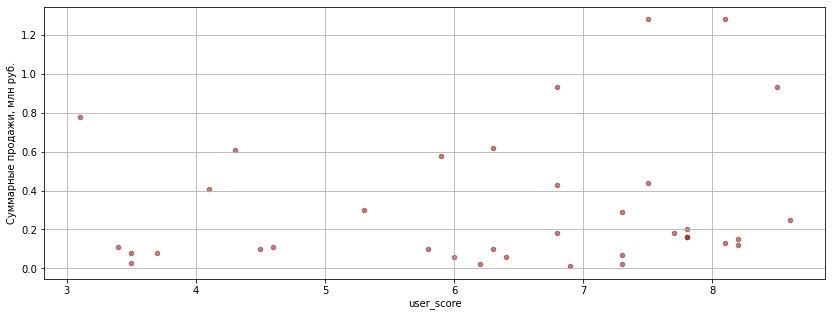

In [213]:
corr_other('user_score', PS3_platform)

**Вывод PS3:**
- оценка критиков имеет положительное влияние на продажи (k=0.45)
- оценка пользователей имеет положительное влияение на продажи (k=0.15)
- оценки критиков в три раза сильнее влияют на продажи, чем оценки пользователей.

- **X360**

In [214]:
X360_platform = actual_data[(actual_data['platform'].isin(['X360'])) & (actual_data['critic_score'] != -1) \
                            & (actual_data['user_score'] != -1)]

На продажи влияют critic_score 0.5257228356581523


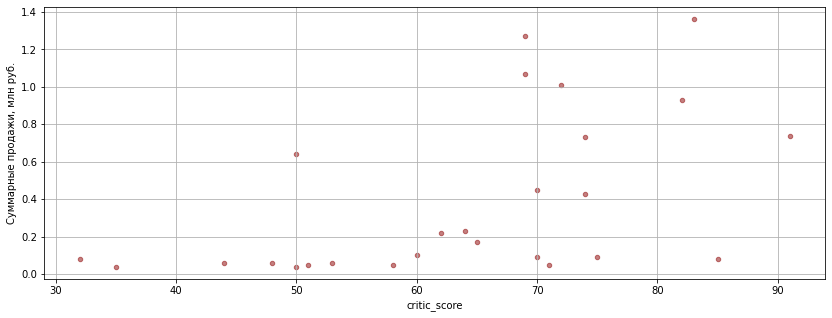

In [215]:
corr_other('critic_score', X360_platform)

На продажи влияют user_score 0.3365136248359934


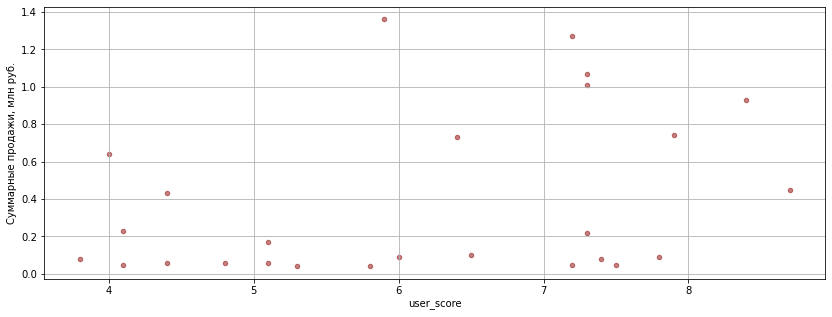

In [216]:
corr_other('user_score', X360_platform)

**Вывод X360:**
- оценка критиков имеет положительное влияние на продажи (k=0.52)
- оценка пользователей имеет положительное влияение на продажи (k=0.33)
- оценки критиков сильнее влияют на продажи, чем оценки пользователей.

**ОБЩИЕ ВЫВОДЫ ПО АНАЛИЗУ ВЛИЯНИЯ ОЦЕНОК КРИТИКОВ И ПОЛЬЗОВАТЕЛЕЙ НА ПРОДАЖИ**

- **оценки пользователей платформ PC, XOne имеют отрицательное влияние на объемы продаж. Причем XOne является в топе лидеров по продажам после PS4;**
- **как правило, оценки критиков сильнее влияют на продажи платформ, чем оценки пользователей. _Исключение:_ платформа WiiU.**
- **в то время, как X360 является далеко не лидерром продаж, ее коэффицициенты влияния оценок критиков и пользователей на продажи самые высокие.**

#### 3.3.8 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [217]:
genre = actual_data.groupby('genre').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).reset_index()
genre.columns = ['genre', 'total_sales']
genre

,genre,total_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


- **сравнение суммарных продаж**

In [218]:
pd.pivot_table(actual_data, index = 'year_of_release', columns='genre', values='total_sales', aggfunc='sum')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


In [219]:
import matplotlib.ticker

''

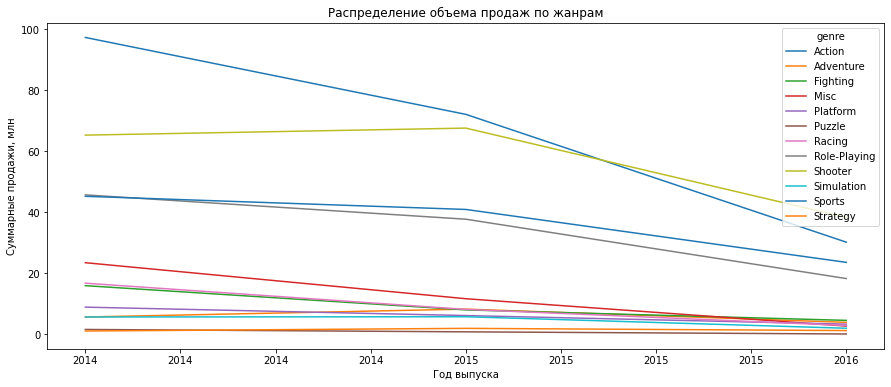

In [220]:
fig, ax = plt.subplots(figsize=(15,6))
pd.pivot_table(actual_data, index = 'year_of_release', columns='genre', values='total_sales', aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска'), plt.ylabel('Суммарные продажи, млн')
plt.title('Распределение объема продаж по жанрам')
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
;

**Выводы:**
- **В игровой индустрии всего 12 жанров с разными объемами продаж (млн руб)**: Action (1534.62), Sports	(1139.42), Shooter (919.57), Misc (727.59), Role-Playing (719.16), Racing (562.61), Platform (486.05), Simulation (336.77), Fighting (313.78), Adventure (184.50), Puzzle (137.53), Strategy (112.12).
- **Лидеры продаж по жанрам - Action (1534 млн руб) и Sports (1134 млн руб).**
- **Самые низкие продажи у жанров Adventure, Puzzle, Strategy (менее 200 млн руб).**
- В 2016-ом году жанр Shooter обошел жанры Action, Sports по объему продаж.

<font color='DarkBlue'><b>Мы здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. </b></font><br>
<font color='DarkMagenta'>Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>

- **cравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы**

In [221]:
pd.pivot_table(actual_data, index = 'year_of_release', columns='genre', values='total_sales', aggfunc='median')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.205,0.04,0.130,0.16,0.83,0.050,0.17,0.110,0.660,0.120,0.46,0.060
2015,0.070,0.03,0.100,0.19,0.10,0.045,0.15,0.105,0.925,0.200,0.12,0.045
2016,0.050,0.02,0.085,0.04,0.10,0.010,0.05,0.120,0.240,0.025,0.12,0.060


''

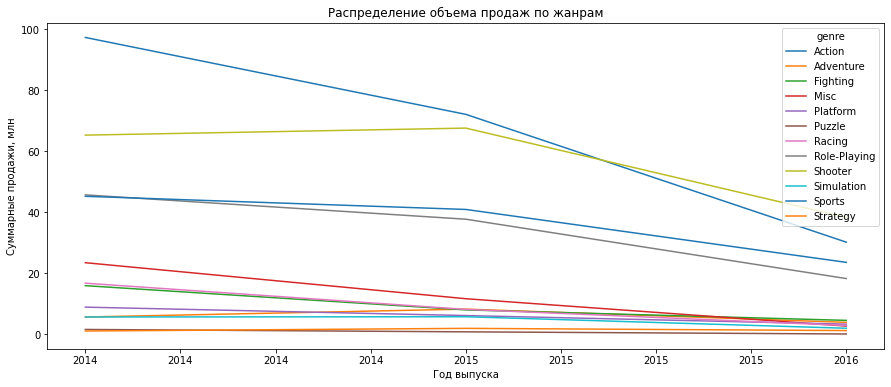

In [222]:
fig, ax = plt.subplots(figsize=(15,6))
pd.pivot_table(actual_data, index = 'year_of_release', columns='genre', values='total_sales', aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска'), plt.ylabel('Суммарные продажи, млн')
plt.title('Распределение объема продаж по жанрам')
ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
;

**ВЫВОДЫ:**
- **бывший когда-то лидером жанр Action, стремительно и стабильно теряет продажи с рассматриваемый актуальный период с 2014 по 2016 годы;**
- **с 2015 года  Action уступает лидерство жанру Shooter, продажи которого уверенно стабильно растут, начиная с 2015 года;**
- **также 2015-ый год - начало подъема продаж жанра Sports, который уже к концу 2015-ого года уверенно обходит жанр Action;**
- **новый лидер продаж, начиная с 2015-ого года - жанр Shooter.**

### 3.4 Портрет пользователя каждого региона

Определиим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (ТОП-5). Опишите различия в долях продаж;
- самые популярные жанры (ТОП-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

#### 3.4.1 ТОП-5 самых популярных платформ в США, Европе и Японии

**Запишем в словарь _top_plf_dict_ данные по продажам ТОП-5 платформ в 3 регионах _{region:df}_**

In [246]:
top_plf_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_plf_dict[region] = actual_data.groupby('platform')[region].sum().sort_values(ascending=False)
top_plf_dict

{'na_sales': platform
 PS4     98.61
 XOne    81.27
 X360    28.30
 3DS     22.64
 PS3     22.05
 WiiU    19.36
 PC       7.23
 PSV      2.52
 Wii      2.08
 PSP      0.00
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     130.04
 XOne     46.25
 PS3      25.54
 PC       17.97
 3DS      16.12
 X360     15.49
 WiiU     13.15
 PSV       3.53
 Wii       2.59
 PSP       0.00
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     44.24
 PS4     15.02
 PSV     14.54
 PS3     11.22
 WiiU     7.31
 PSP      0.36
 XOne     0.32
 X360     0.08
 PC       0.00
 Wii      0.00
 Name: jp_sales, dtype: float64}

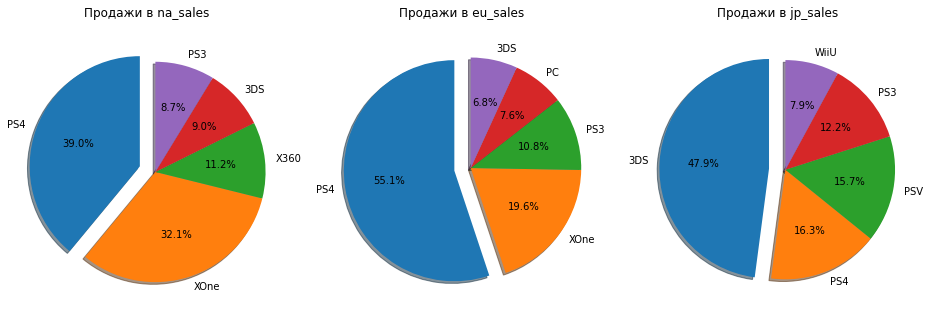

In [224]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top_plf_dict[region[i]].index
    sizes = top_plf_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

**ВЫВОДЫ:**
- Лидеры продаж во всех регионах разные: Америка - X360 (24.5%), Европа - PS2 (24.4%) и Япония - DS (30,7%). 
- В Америке и Европе пользуются в основном одними и теми же 4 платформами - X360, PS2, Wii, PS3, исключение в Америке любят болше DS,а в Европе PS. 
- В Японии совсем другая картина: тут более популярны платформы DS, SNES и 3DS. Надо отметить, что платформа PS2 очень популярна во всех регионах.

#### 3.4.2 ТОП-5 самых популярных жанров в регионах

Запишем в словарь _top_plf_dict_ актуальные данные по продажам ТОП-5 жанров в 3 регионах _{region:df}_. Действуем так же, как в пункте выше.

In [225]:
top_genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genre_dict[region] = actual_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top_genre_dict

{'na_sales': genre
 Shooter         79.02
 Action          72.53
 Sports          46.13
 Role-Playing    33.47
 Misc            15.05
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          74.68
 Shooter         65.52
 Sports          45.73
 Role-Playing    28.17
 Racing          14.13
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    31.16
 Action          29.58
 Fighting         6.37
 Misc             5.61
 Shooter          4.87
 Name: jp_sales, dtype: float64}

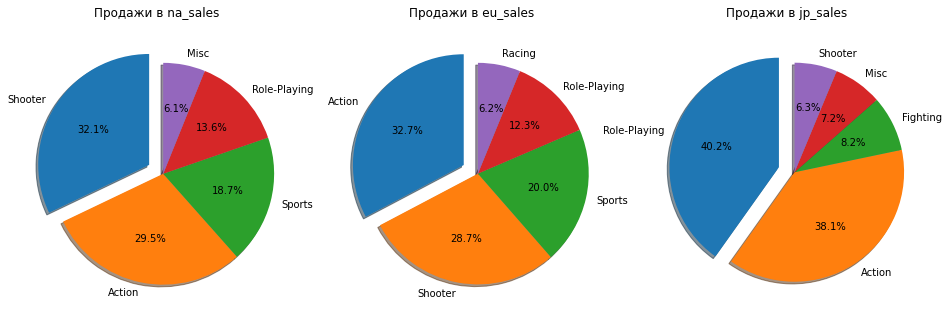

In [226]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = top_genre_dict[region[i]].index
    sizes = top_genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()

**ВЫВОДЫ:**
- Лидер жанра видеоигр по продажам в США и Европе одинаков - Action. 
- В Японии же самый популярный жанр - Role-Playing, а Action идет на втором месте.
- Жанр Misc стоит на третьем месте в США и Европе и на втором в Японии.
- Вкусы игроманов в Европе и США во многом схожи, однако после жанр Role-Playing отсутствует в ТОП-5 в Европе, но есть в США, а также жанр Racing  не входит в ТОП-5 в США и Японии, но входит в ТОП-5 в Европе.

#### 3.4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

Данные в колонке ESRB рейтинга были заполнены плохо в исходном датасете и не могут заполнены в рамках данного исследования автором. Пропуски были заполнены значением _'no raiting'_, что в сумме составляет около 40% суммарных продаж видеоигр, рейтинг которых неизвестен.

In [227]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

pd.options.mode.chained_assignment = None

In [228]:
esrb = actual_data.groupby('raiting')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False).reset_index()
esrb

/var/folders/f0/6n5cj1pd2td3sgkgfsl766lr0000gn/T/ipykernel_83612/20220189.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb = actual_data.groupby('raiting')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='eu_sales', ascending=False).reset_index()


,raiting,na_sales,eu_sales,jp_sales
0,M,96.42,93.44,8.01
1,RP,64.72,58.95,56.90
2,E,50.74,58.06,8.94
3,T,38.95,34.07,14.78
4,E10+,33.23,26.16,4.46


**FYI**

[Entertainment Software Rating Board (ESRB)](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

- «E» («Everyone») — «Для всех»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC»(«K-A» - в ранних версиях с 1994-1997 годы) («Early childhood») — «Для детей младшего возраста»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

**ВЫВОДЫ**
- 40-50% объема продаж занимают видеоигры без рейтинга, которые имели значение RP в исходном датасете или были заполнены автором исследования. Это мешает сделать корректные выводы о Японии.
- По США и Европе выводы схожи: самые высокие рейтинги занимают три жанра - «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых».

### 3.5 Проверка гипотез

#### 3.5.1 _Hypothesis 1_ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средние пользовательские рейтинги платформ Xbox One (user_score) = Средние пользовательские рейтинги платформ PC (user_score)
H_a: Средние пользовательские рейтинги платформ Xbox One (user_score) ≠ Средние пользовательские рейтинги платформ PC (user_score)

alpha = 0.05
```

Выделим две выборки по двум разным платформам согласно нулевой гипотезе. **Для тестирования гипотез используем двусторонний t-тест Стьюдента.**

In [229]:
data_XOne = actual_data.query('platform == "XOne"')['user_score']
data_XOne

99      -1.0
165      7.9
179      5.4
241      6.4
269      6.2
        ... 
16361    8.2
16374    6.6
16376   -1.0
16391    6.7
16403   -1.0
Name: user_score, Length: 228, dtype: float64

In [230]:
actual_data.query('platform == "XOne"')['user_score'].unique(), len(actual_data.query('platform == "XOne"')['user_score'])

(array([-1. ,  7.9,  5.4,  6.4,  6.2,  4.1,  5.5,  7.5,  4.4,  7.2,  3.1,
         6.1,  8.2,  6.9,  6.3,  5.8,  6.6,  7.3,  8. ,  9.2,  7.8,  8.4,
         5.9,  5.1,  5.2,  7.7,  7.4,  5.6,  7. ,  6.7,  4.6,  5.7,  6.8,
         8.1,  6. ,  7.1,  3.2,  8.6,  8.5,  4.3,  5.3,  4. ,  8.3,  8.7,
         2.1,  7.6,  4.9,  8.9,  1.6,  4.2,  8.8]),
 228)

In [231]:
data_PC = actual_data.query('platform == "PC"')['user_score']
data_PC

455      3.9
1516     5.4
1659    -1.0
1711     7.9
2274     5.7
        ... 
16241    7.9
16250    1.4
16348   -1.0
16362   -1.0
16423    7.6
Name: user_score, Length: 151, dtype: float64

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примем метод scipy.stats.ttest_ind(). Методу передадим в качестве параметров массивы, содержащие выборки.

Чтобы определиться, какое значение True или False ставить в _equal_var_ при вызове метода scipy.stats.ttest_ind(), сравним дисперсии полученных выборок data_XOne и data_PC.

In [232]:
data_XOne = pd.to_numeric(data_XOne, errors='coerce').astype('float64')
data_PC = pd.to_numeric(data_PC, errors='coerce').astype('float64')

In [233]:
print('variance XOne =', np.var(data_XOne))
print('variance PC =', np.var(data_PC))

variance XOne = 12.893624769159748
variance PC = 10.589989035568612


In [236]:
var_difference = ((np.var(data_XOne) - np.var(data_PC))/np.var(data_PC)*100)

In [237]:
print(var_difference, '%')

21.75295673917991 %


**Дисперсии двух выборок отличаются на 17.89%, значит, значение equal_var надо проставить вручную. По умолчанию equal_var=True, то есть дисперсии выборок одинаковы. Однако у нас дисперсии разнные, значит, поставим equal_var=False, чтобы тест посчитал результаты по каждой выборке.**

**Критический уровень статистической значимости 5%, то есть _alpha = 0.05_.**

In [238]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(data_XOne, data_PC, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.26246011727057733
Не получилось отвергнуть нулевую гипотезу


**Вывод по гипотезе 1:**
- **Нулевая гипотеза поддерживается, значит, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

#### 3.5.2 _Hypothesis 2_ - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средние пользовательские рейтинги жанра Action (англ. «действие», экшен-игры) (user_score) = Средние пользовательские рейтинги жанра Sports (англ. «спортивные соревнования») (user_score)
H_a: Средние пользовательские рейтинги жанра Action (англ. «действие», экшен-игры) (user_score) ≠ Средние пользовательские рейтинги жанра Sports (англ. «спортивные соревнования») (user_score)

alpha = 0.05
```

Выделим две выборки по двум разным платформам согласно нулевой гипотезе.

In [239]:
genre_Action = actual_data.query('genre == "Action"')['user_score']

In [240]:
genre_Sports = actual_data.query('genre == "Sports"')['user_score']

In [241]:
genre_Action = pd.to_numeric(genre_Action, errors='coerce').astype('float64')
genre_Sports = pd.to_numeric(genre_Sports, errors='coerce').astype('float64')

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примем метод scipy.stats.ttest_ind(). Методу передадим в качестве параметров массивы, содержащие выборки.

Чтобы определиться, какое значение True или False ставить в equal_var при вызове метода scipy.stats.ttest_ind(), сравним дисперсии полученных выборок genre_Action и genre_Sports.

In [242]:
print('variance of genre "Action" =', np.var(genre_Action))
print('variance of genre "Sports"=', np.var(genre_Sports))

variance of genre "Action" = 15.940025263531574
variance of genre "Sports"= 9.153242544654907


Видно невооруженным глазом, что дисперсии сильно отличаются, значит необходимо добавить параметр equal_var = False в метод тестирования гипотезы.

In [244]:
var_dif_genre = ((np.var(genre_Action) - np.var(genre_Sports))/np.var(genre_Sports)*100)
print(var_dif_genre, '%')

74.14621305801464 %


In [245]:
alpha = 0.05

results = st.ttest_ind(genre_Action, genre_Sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.829371809684136e-05
Отвергаем нулевую гипотезу


**Вывод по гипотезе 2:**
- **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») _действительно_ разные, что доказано тестированием гипотезы 2.**

<font color='DarkBlue'><b>Для будущего исследования:</b></font><br>
<font color='DarkMagenta'>Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

## 4 Общие выводы

### 4.1 Исходные данные

- После прочтения исходного датасета видим, что число наблюдений равно около 16000, однако в некотороых переменных (Critic_Score, User_Score, Rating) наблюдений сильно меньше. Надо будет проверить эти переменные на пропуски и постараться заполнить их.
- Названия колонок в датасете приведены с верхним регистром, что может быть неудобно в дальнейшем анализе. На этапе предобработки названия лучше привести к инжнему регистру.
- На этапе предобработки надо проверить типы данных. Например, тип данных float для года (_'year_of_release'_) не совсем подходит.

### 4.2 Предобработка данных

- В ходе предобработки данных названия столбцов были приведены их к нижнему регистру.
- Были выявлены 4 колонки в данных с пропущенными значениями: critic_score (51%), user_score (50%), raiting (40%) и year_of_release (2%).
- Пропуски объемом более 10% были обработаны.
- Были заполнены пропуски медианой для числовых значения; колонка ESRB рейтинга с категориальными переменными была заполнены RP, что означает, что рейтинг ожидается.
- Были посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.
- В колонке ’name'  были удалены неявные дубликаты (некоторые названия содержали слэши).

### 4.3 Результаты анализа данных

- **По медианным значениям продаж лидерами являются PS4, WiiU, XOne, 3DS, значит, имеет смысл увеличивать рекламный бюджет на продажи этих платформ.**
- **Оценки критиков имеет более сильную корреляцию с продажами, чем оценки пользователей. Значит, имеет смысл привлекать больше критиков для оценивания платформ.**
- **Лидер продаж - платформа PS2 и жанр Action (США, Европа) и Role-Playing в Японии.**
- **Самые высокие рейтинги занимают три жанра - «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых».**
- **Бывший когда-то лидером жанр Action, стремительно и стабильно теряет продажи с рассматриваемый актуальный период с 2014 по 2016 годы;**
- **Новый лидер продаж, начиная с 2015-ого года - жанр Shooter. Имеет смысл продолжать развивать его.**

### 4.4 Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (нулевая гипотеза поддерживается).
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

### Tools used for this project:
- Python (pandas, matpplotlib, scipy, seaborn)
- statistics (hypothesis testing)

_Thank you for going through this project. Your feedback and comments are very welcome to_ **_ybezginova2021@gmail.com_**

_Thank you!_

_Best wishes,_

_Yulia_